In [ ]:
!pip install yfinance pandas-ta vectorbt plotly scipy scikit-image opencv-python --quiet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import yfinance as yf

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def columns_tolower_snake_case(df):
    df.columns = [column.lower().replace(" ", "_") for column in df.columns]

In [ ]:
adbe_df = yf.download("ADBE")

[*********************100%***********************]  1 of 1 completed


In [ ]:
adbe_df['Returns'] = adbe_df["Adj Close"].pct_change()

In [ ]:
adbe_df.drop(["Open","High", "Low", "Close", "Adj Close", "Volume"], axis=1, inplace=True)

In [ ]:
adbe_df

,Returns
Date,
1986-08-13,NaN
1986-08-14,0.055552
1986-08-15,-0.017543
1986-08-18,-0.035712
1986-08-19,0.018518
...,...
2022-06-27,-0.017152
2022-06-28,-0.040517
2022-06-29,0.007849


In [ ]:
adbe_df.reset_index(drop=True, inplace=True)
adbe_df.dropna(inplace=True)

In [ ]:
adbe_df2 = adbe_df * adbe_df

result = pd.concat([adbe_df, adbe_df, adbe_df], axis=1)

In [ ]:
result


,Returns,Returns,Returns
1,0.055552,0.055552,0.055552
2,-0.017543,-0.017543,-0.017543
3,-0.035712,-0.035712,-0.035712
4,0.018518,0.018518,0.018518
5,0.000000,0.000000,0.000000
...,...,...,...
9040,-0.017152,-0.017152,-0.017152
9041,-0.040517,-0.040517,-0.040517
9042,0.007849,0.007849,0.007849
9043,-0.006621,-0.006621,-0.006621


In [ ]:
x_reduced = PCA(n_components=3).fit_transform(result)


/var/folders/ys/j9bjqvyn1ys323bhx0h6l40r0000gn/T/ipykernel_8179/4229617598.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(fig)


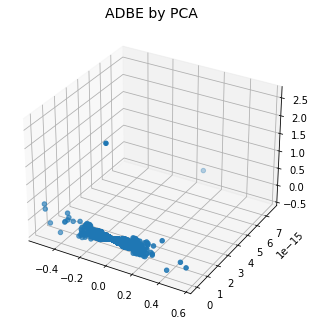

In [ ]:
fig = plt.figure()
axes = Axes3D(fig)
axes.set_title("ADBE by PCA", size=14)
axes.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2])

/opt/homebrew/Caskroom/miniforge/base/envs/project2_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/project2_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


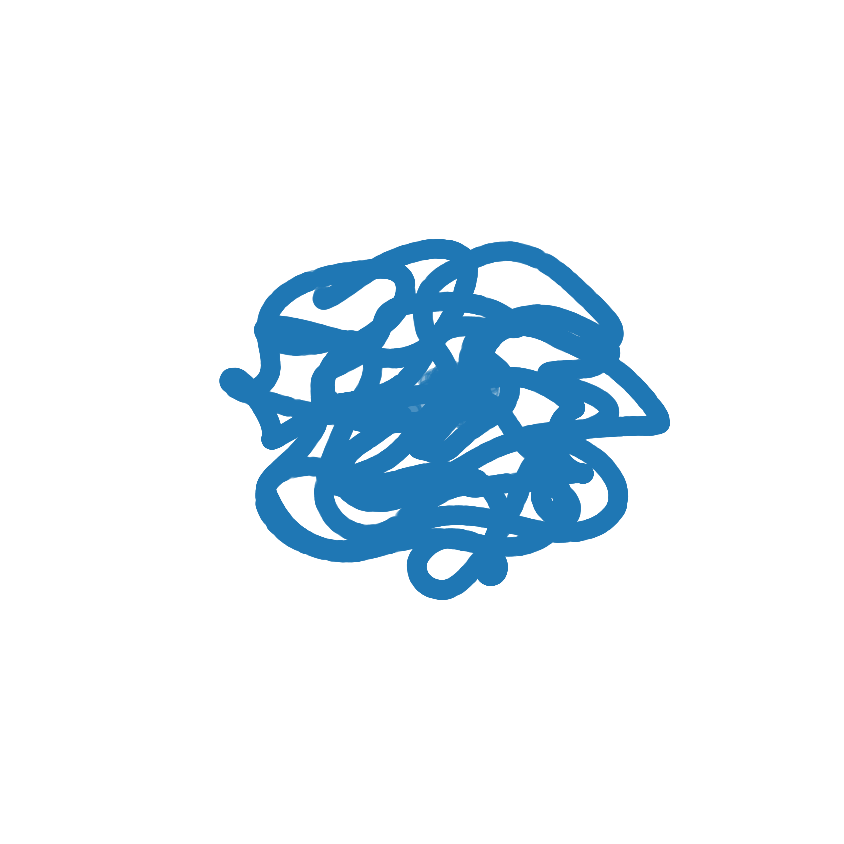

In [ ]:
# imports from matplotlib import pyplot as plt

import matplotlib
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA




#TSNE(3)
data = TSNE(n_components=3, random_state=0).fit_transform(x_reduced)
x, y, z = list(zip(*data))

fig = matplotlib.pyplot.figure(dpi=256)
somefunc=fig.get_size_inches()
fig.set_figheight(6)
fig.set_figwidth(4)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z)
plt.axis("off")
fig.savefig("adbe.png")

In [ ]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.reshape(data, ((6 * 256), (4 * 256),3,1))
    data = np.rot90(data)
    data = np.transpose(data)
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 6.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(int(rows_data)):
        for j in range(int(columns_data)):
            axarr[i].imshow(data[i][j], cmap="gray")
            axarr[i].axis("off")

    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.axis("off")
#     plt.show()
#     HTML(f.to_html().show())


In [ ]:
# import numpy as np
# import imageio
# import math
# from pprint import pprint
# from scipy.ndimage import geometric_transform
# images = []
# def shift_func(output_coordinates):
#     return (output_coordinates[0] - 0.5, output_coordinates[1] - 0.5)

# for n in range(0, 100):
#     if n >= 4 / 90:
#         ax.azim = ax.azim+1.1
#     fig.canvas.draw()
#     image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
#     image = geometric_transform(image, shift_func)
#     image = image.reshape(image, ((6 * 256), (4 * 256),3))
#     image = np.rot90(image)
#     image = np.transpose(image)
#     display(plot_slices(math.floor(math.sqrt(6*256)), 
#                         math.floor(math.sqrt(4*256)), 
#                         (6 * 256), 
#                         (4 * 256), 
#                         image))
#     images.append(image)
#     imageio.imsave(f'adbe_image_{n}.png', image)

    
# imageio.mimsave("adbe.gif", images)

In [ ]:
# def remove_parallel_pixels(imarr):
    

In [ ]:
import numpy as np
import random
import imageio
import math
from pprint import pprint
from scipy import ndimage
from scipy.ndimage import geometric_transform
images = []
def shift_func(output_coordinates):
    return (output_coordinates[0] - 0.5, output_coordinates[1] - 0.5)


# def 

for n in range(0,
               #number
               1
              ):
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')

#     non_white_parallel_pixels = 0 
#     non_white_pixels= 0
    
#     white_parallel_pixels= 0
#     white_pixels= 0
    
#     print(len(image)/4)
#     upper_left = [0,0]
#     upper_right = [0, (len(image)/4)]
#     upper_left = [0,]
#     upper_right = [0, (len(image)/4)]
    

#     print(random.choice(image))
    
#     new_image =[]
#     for i in range(len(image)):
#         if image[i] == 255 and image[i+1] == 255:
#             continue
#         elif image[i] == 255 and image[i+1] != 255:
#             new_image.append(image[i])
#         else:
#             new_image.append(image[i])

#     if mylist = banana:
      
#     else:
        
        
#     print(new_image)

    
    image_array = np.reshape(image, ((6 * 256), (4 * 256),3,1))
    print(image_array.shape)
    print("HEIGHT", len(image_array))
    print("WIDTH", len(image_array[0]))
    
    print("DIMENSION 3")
    pprint(image_array[0][0])
    
    print("DIMENSION 4")
    pprint(image_array[0][0][0])
#     non_white_pixels = np.reshape(non_white_pixels, ((6 * 256), (4 * 256),3))
#     non_white_pixels = np.reshape(non_white_pixels, ((6 * 256), (4 * 256),1))


    
#     plt.imshow(non_white_pixels)
#     markers = np.zeros_like(image).astype(np.int16)
#     markers[0] = 1
#     markers[200] = 2
#     markers[350] = 3
#     markers[260] = 4
#     res1 = ndimage.watershed_ift(image.astype(np.uint8), markers)
#     plt.imshow(res1, cmap='jet')
#     image = geometric_transform(image, shift_func)
#     pprint(image)
#     display(plot_slices(math.floor(math.sqrt(6*256)), 
#                         math.floor(math.sqrt(4*256)), 
#                         (6 * 256), 
#                         (4 * 256), 
#                         image))

(1536, 1024, 3, 1)
HEIGHT 1536
WIDTH 1024
DIMENSION 3
array([[255],
       [255],
       [255]], dtype=uint8)
DIMENSION 4
array([255], dtype=uint8)


In [ ]:
#!kill -9 -1

In [ ]:
# rng = np.random.default_rng()
im3d = np.random.randint(100, 1000, 1000, np.uint16)
from skimage import morphology
from scipy import ndimage as ndi
from scipy.ndimage import watershed_ift
seeds = ndi.label(im3d < 0.1)[0]
ws = watershed_ift(im3d, seeds)

In [ ]:
# from skimage import segmentation
# slics = segmentation.slic(im3d, spacing=[5, 1, 1], channel_axis=None)

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('adbe.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2.imwrite("thresh.png",thresh)

True

In [ ]:
ret

177.0

In [ ]:
image = cv2.imread('thresh.png')
cv2.imshow('thresh.png', image)


In [ ]:
imgheight = img.shape[0]
imgwidth = img.shape[1]

In [ ]:
canny = cv2.Canny(img,100,200)
cv2.imwrite("canny.png",canny)

True

In [ ]:
cv2.imshow('canny.png', canny)


In [ ]:
M = 76

N = 104

x1 = 0

y1 = 0
for y in range(0, imgheight, M):

    for x in range(0, imgwidth, N):

        if (imgheight - y) < M or (imgwidth - x) < N:

            break



        y1 = y + M

        x1 = x + N



        # check whether the patch width or height exceeds the image width or height

        if x1 >= imgwidth and y1 >= imgheight:

            x1 = imgwidth - 1

            y1 = imgheight - 1

            #Crop into patches of size MxN

            tiles = canny[y:y+M, x:x+N]

            #Save each patch into file directory

            cv2.imwrite('./saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)

            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)

        elif y1 >= imgheight: # when patch height exceeds the image height

            y1 = imgheight - 1

            #Crop into patches of size MxN

            tiles = canny[y:y+M, x:x+N]

            #Save each patch into file directory

            cv2.imwrite('./saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)

            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)

        elif x1 >= imgwidth: # when patch width exceeds the image width

            x1 = imgwidth - 1

            #Crop into patches of size MxN

            tiles = canny[y:y+M, x:x+N]

            #Save each patch into file directory

            cv2.imwrite('./saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)

            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)

        else:

            #Crop into patches of size MxN

            tiles = canny[y:y+M, x:x+N]

            #Save each patch into file directory

            cv2.imwrite('./saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)

            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)